# Uniswap: constant product

In [19]:
import math
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

## Sophisticated formula

We want to find a way to define a pool's exchange rate so that the balance of the tokens remain relatively constant. Let's say we have a pool with $x$ amount of ETH and $y$ amount of DAI. The exchange rate is defined so that at anytime the relative balance of the two tokens remain proportional to a constant $k$. We state:

$$x * y = k$$

Defining the exchange rate this way has two consequences:

- The more an exchange moves the balance of the two tokens, the more the pool's exchange rate is unfavorable compared to the market exchange rate
- The pool's exchange rate will always tend toward the market exchange rate

### Example

We have a pool ETH/DAI  
For instance, the market exchange rate is 1600 DAI for 1 ETH.  
Let's say the pool has 160 000 DAI and 100 ETH, so k = 16 000 000

I want to buy 1 ETH, how much DAI will I pay?

We want that at anytime $ETH * DAI = k$

So after the exchange, the balances in the pool must be:

$$ (ETH - 1) * (DAI + y) = k$$

with $y$ the amount of DAI that must be paid to keep the product constant. So the amount $y$ that I need to pay is:

$$y = \frac{k}{ETH - 1} - DAI$$

## Generalization

We can express that in terms of proportion of the pool's balances. 

If I withdraw $p_x$ percent of token $X$, I pay $p_y$ percent of token $Y$. If the ratio $X/Y$ is equal to the market exchange rate, then a exchange in the pool is at the market rate if $p_x = p_y$.

The constant product formula makes it so that $p_x$ is never equal to $p_y$, but rather $p_y$ increases faster when $p_x$ increases. That is, if I withdraw a proportion of token $X$, I must deposit a bigger proportion of token $Y$.

After an exchange of $p_x$, $p_y$, the product must stay invariant:

$$ ((1-p_x)*X)*((1+p_y)*Y) = k$$

$$ p_y = \frac{1}{Y} * \frac{k}{(1-p_x)*X} - 1$$

But we have, $Y = k / X$, so:

$$p_y = \frac{X}{k} * \frac{k}{(1-p_x)*X} - 1$$

$$p_y = \frac{1}{1-p_x} - 1$$

$$p_y = \frac{px}{1-p_x}$$

Recognize this formula?


In [246]:
# If I want to withdraw px% of a token, I must add px / (1-px) percent of the other token
def py(px):
    return px / (1-px)

Text(0, 0.5, 'Proportion of token B to pay')

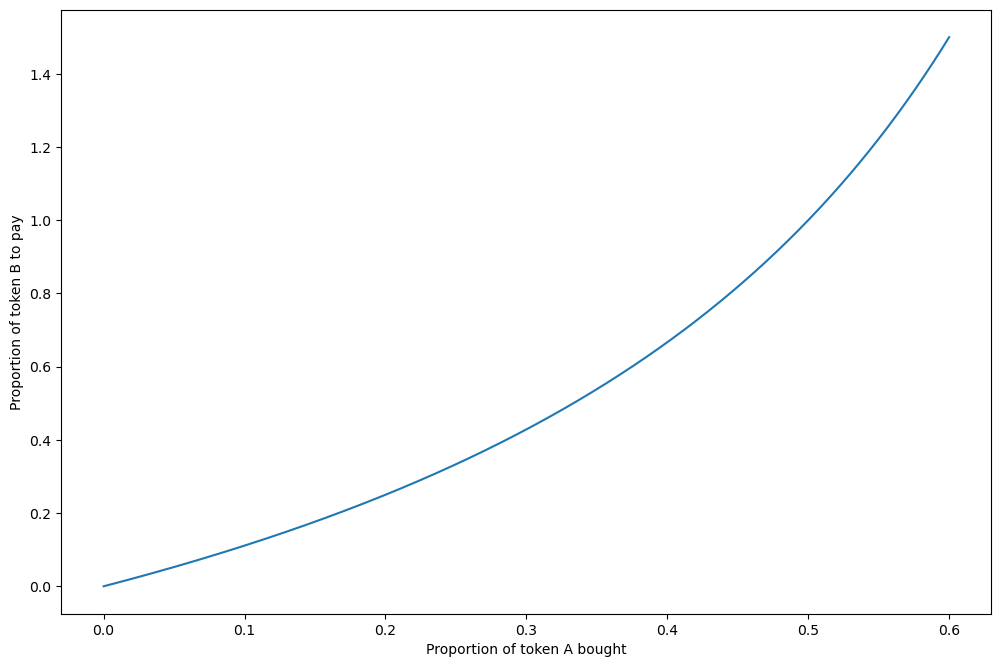

In [256]:
px = np.linspace(0.000001, 0.6, 10000) # proportion of pool's ETH bought

plt.plot(px, py(px))
plt.xlabel("Proportion of token A bought")
plt.ylabel("Proportion of token B to pay")

We can also express that in terms of relative proportions of $p_x$ and $p_y$.

An exchange at the market rate means that $p_y / p_x = 1$. With the constant product formula, we have $p_y / p_x > 1$, with

$$ \frac{p_y}{p_x} = \frac{1}{1 - p_x}$$

This shows that when $p_x$ is small, the ratio (exchange rate) is close to 1 (close to the market exchange rate), and tends to infinity when $p_x$ tends to 1.

Thus achieving the property that the bigger the exchange is relative to the pool's size, the more disadvantageous it is compared to the market rate, thus preserving the pool's equilibrium.

Text(0, 0.5, 'Relative price')

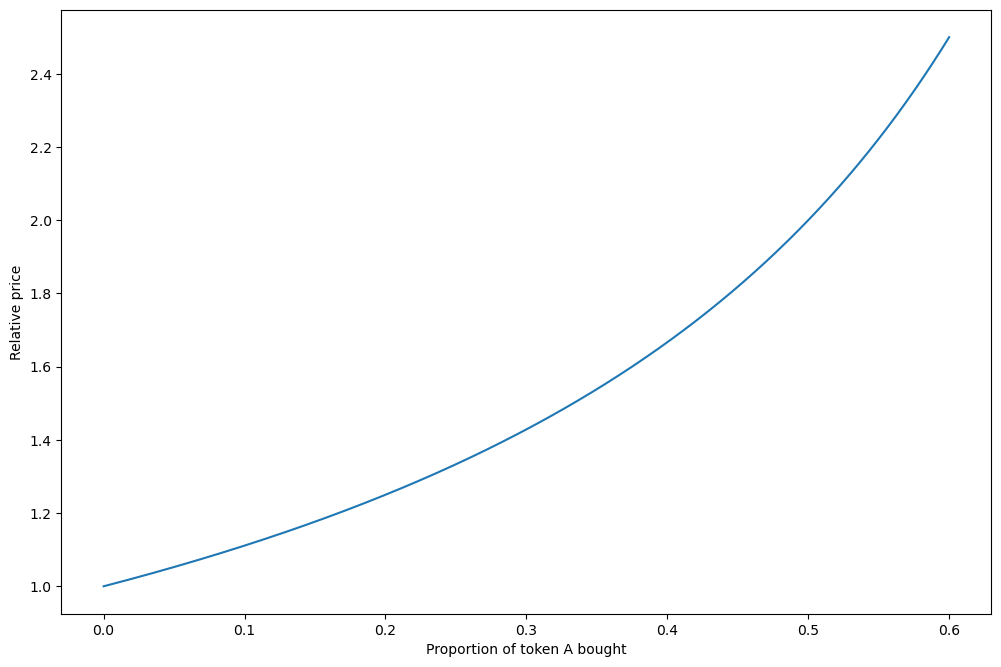

In [253]:
px = np.linspace(0.000001, 0.6, 10000) # proportion of pool's ETH bought

plt.plot(px, py(px) / px)
plt.xlabel("Proportion of token A bought")
plt.ylabel("Relative price")

### The pool's exchange rate will always tend toward the market exchange rate

Let's say we start with a pool of $X$ and $Y$ tokens, with $X/Y$ at the market exchange rate.

Trader A gets $p_xA = 1\%$ of $X$ tokens, and thus pays $p_yA = 0.01 / (1-0.01) = 1.01\%$ of $Y$ tokens.

Now the pool has $X * (1 - p_xA)$ and $Y * (1 + p_yA)$ tokens.

Trader B now wants $p_yB$ of $Y$ tokens, so he must pay $p_xB = p_yB / (1 - p_yB)$

However, since the balance of $Y$ tokens in the pool has increased thanks to trader A, $p_xB$ is lower than if the balances were $X$ and $Y$.

$$ (X \cdot (1 - p_xA) \cdot (1 + p_xB)) * (Y \cdot (1 + p_yA) \cdot (1 - p_yB)) = k$$

$$ p_xB = \frac{k}{(X \cdot (1 - p_xA) * (Y \cdot (1 + p_yA) \cdot (1 - p_yB))} - 1$$

With $Y = k / X$

$$ p_xB = \frac{1}{(1 - p_xA) \cdot (1 + p_yA) \cdot (1 - p_yB)} - 1$$

Without the first trade, trader B would have paid:

$$ p_xB = \frac{1}{1 - p_yB} -1$$

Since $(1 - p_xA) \cdot (1 + p_yA) = 1$ 


is necessarily greater than zero, then $p_xB$ with the first trade is smaller than without the first trade.

In [258]:
py(0.01)

0.010101010101010102